In [1]:
import numpy as np
import math
import matplotlib as mpl
#mpl.style.use('Solarize_Light2')
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
from qiskit.providers.ibmq import *
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

import  qiskit.circuit.library.grover_operator

In [8]:
sim = Aer.get_backend('statevector_simulator')

[ 0.+0.0000000e+00j  0.+0.0000000e+00j  1.-1.2246468e-16j
 -0.+0.0000000e+00j]


In [49]:
def simons(b):
    b=b[::-1]
    n = len(b)
    qc = QuantumCircuit(2*n,2*n)
    r1 = list(range(n))
    r2 = list(range(n,2*n))
    qc.h(r1)
    qc.barrier()
    qc.cx(r1,r2)
    i=0
    for x in b:
        if x=='1':
            qc.cx(n-1,n+i)
        i+=1
    qc.barrier()
    #qc.measure(r2,r1)
    qc.h(r1)
    qc.measure(r1,r1)
    qc.measure(r2,r2)
    return qc

In [50]:
qc=simons('11')
qc.draw()

┌───┐ ░                      ░ ┌───┐   ┌─┐   
q_0: ┤ H ├─░───■──────────────────░─┤ H ├───┤M├───
     ├───┤ ░   │                  ░ ├───┤   └╥┘┌─┐
q_1: ┤ H ├─░───┼────■────■────■───░─┤ H ├────╫─┤M├
     └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │   ░ └┬─┬┘    ║ └╥┘
q_2: ──────░─┤ X ├──┼──┤ X ├──┼───░──┤M├─────╫──╫─
           ░ └───┘┌─┴─┐└───┘┌─┴─┐ ░  └╥┘ ┌─┐ ║  ║ 
q_3: ──────░──────┤ X ├─────┤ X ├─░───╫──┤M├─╫──╫─
           ░      └───┘     └───┘ ░   ║  └╥┘ ║  ║ 
c: 4/═════════════════════════════════╩═══╩══╩══╩═
                                      2   3  0  1

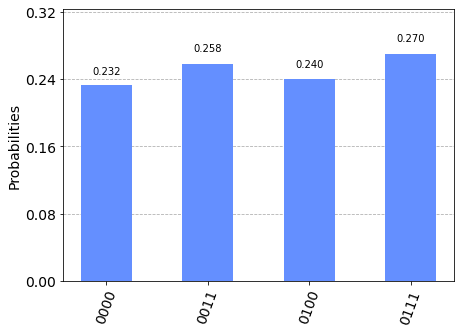

In [51]:
plot_histogram(
    execute(qc,sim,shots=1024).result().get_counts()
)

In [53]:
h= np.matrix([[1,1],[1,-1]])*1/math.sqrt(2)
print(h)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [56]:
h2=np.kron(h,h)
print(h2)

[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


In [178]:
def cnot(num,i,j):
    mi = 2**i
    mj = 2**j
    if num&mi!=0:
        if num&mj!=0:
            num = (~mj)&num
        else:
            num = mj|num
    return num
def cx(i,j):
     c = np.zeros((2**4,2**4))
     for x in range(2**4):
          c[x][cnot(x,j,i)]=1
     return np.matrix(c)

In [179]:
I2 = np.identity(4)

In [180]:
q_ = [0,]*(2**4)
q_[0]=1
q = np.matrix(q_)
q=q.transpose()

In [181]:
op1 = np.kron(h2,I2)

In [182]:
q2=np.matmul(op1,q)

In [183]:
op2 = cx(0,2)

In [184]:
q3 = np.matmul(op2,q2)

In [185]:
op3 = cx(1,3)

In [186]:
q4 = np.matmul(op3,q3)

In [187]:
op4 = cx(1,2)

In [188]:
q5 = np.matmul(op4,q4)

In [189]:
op5 = cx(1,3)

In [190]:
q6 = np.matmul(op5,q5)

In [191]:
op6 = op1

In [192]:
q7 = np.matmul(op6,q6)

In [193]:
print(q7)

[[ 0.5]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [ 0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]


In [194]:
w = 0
for i in range(2**4):
    if q7[i]!=0:
        print(q7[i],'  ',"{:04b}".format(i))
    w+=q7[i]**2
print(w)

[[0.5]]    0000
[[0.5]]    0011
[[0.5]]    0100
[[-0.5]]    0111
[[1.]]


In [197]:
me = list()
for i in range(4):
    m=0
    for j in range(4):
        m+=math.fabs(q7[i+j*4])
    print(m)
    me.append(m/2)
print(me)

0.9999999999999996
0.0
0.0
0.9999999999999996
[0.4999999999999998, 0.0, 0.0, 0.4999999999999998]


In [177]:
cx(1,0)

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [176]:
cnot(1,0,1)

3